In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab


In [2]:
# Matriz de interacao

inter_matrix = np.array([[0, 1, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [-1, 0, 0, 1, 0],
        [-1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0]])

In [3]:
# Funcao que calcula o proximo estado
# usando a multiplicacao da matriz de 
# interacao com um vetor de estado atuais

def prox_est(inter_matrix,lista):    
    x = np.array([lista])
    y = np.matmul(x,inter_matrix)
    z = []
    for i in range(0, len(y[0])):
        if y[0][i] > 0:
            z.append(1)
        if y[0][i] < 0:
            z.append(0)
        if y[0][i] == 0:
            z.append(x[0][i])
        

    return z

In [4]:
# O vetor com as possibilidades de estado
# pode ser representado como um numero em binario.
# Como sao 5 genes com 2 possibilidades temos
# que ter 2**5 = 32 numeros. Ou de 0 à 31.

def listas(n):
    listas = []
    for i in range(n):
        listas.append(list(bin(i)[2:]))
    for i in listas:
        while len(i) < 5:
            i.insert(0,'0')
    return listas  

todos = []
for i in listas(32):
    i = [int(x) for x in i]
    todos.append(i)

print(todos)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]]


In [7]:
# Aplicamos a fucacao que encontra o proximo estado
# a todas as possibilidades de estado

transicao = []
for i in todos:
    x = ''.join(str(e) for e in i)
    y = ''.join(str(e) for e in prox_est(np.array(inter_matrix).T,i))
    transicao.append((x,y))
    print(x, ":", y)

00000 : 00000
00001 : 11001
00010 : 00111
00011 : 11111
00100 : 00110
00101 : 11111
00110 : 00111
00111 : 11111
01000 : 11000
01001 : 11001
01010 : 11111
01011 : 11111
01100 : 11110
01101 : 11111
01110 : 11111
01111 : 11111
10000 : 10000
10001 : 11001
10010 : 10001
10011 : 11001
10100 : 10000
10101 : 11001
10110 : 10111
10111 : 11111
11000 : 11000
11001 : 11001
11010 : 11001
11011 : 11001
11100 : 11000
11101 : 11001
11110 : 11111
11111 : 11111


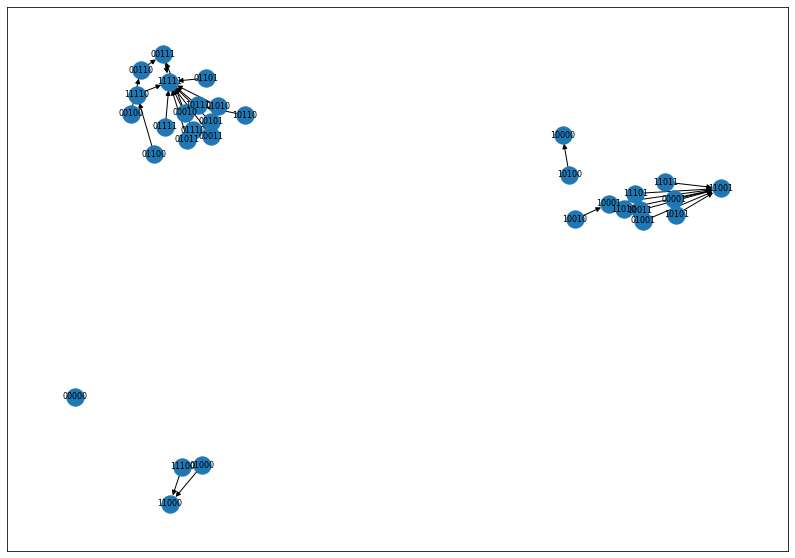

32

In [8]:
# Cria a imagem do grafo

G = nx.DiGraph()
G.add_edges_from(transicao)
pos = nx.spring_layout(G)
plt.figure(3,figsize=(14,10)) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

# Conta o numero de arestas

G.number_of_edges()